## Class Session 2 : Basic Classification & Regression

### Pre-Class Work
### 1. Moore's Law

URL for data[http://preshing.com/files/specdata20120207.zip]

check here[https://preshing.com/20120208/a-look-back-at-single-threaded-cpu-performance/] for more information and analysis

In [93]:
#set up the environment
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

data = pd.read_csv(r'C:\Users\green\Desktop\benchmarks.txt')
dates = []

#making date and time (method1)
#for i in data['testID']:
#    day = i[-14:-6]
    #print(day)
#    dates.append(day)
#data['date'] = dates

#method2 of making date and time
'''date = data.testID.str.split('-').str[1]
for i in range(len(date)):
    date[i] = str(date[i])
data['date'] = date

#fix some notations of the date
wrong = []
for i in range(len(data.date)):
    if len(data.date[i]) != 8:
        wrong.append(i)
data.dropna(axis=0, how='all', subset=data['date'],inplace = True)
for i in wrong:
    data.date[i] = '19'+data.date[i]

# Benchmark of my choice
data = data[data['benchName']=='147.vortex']
data.reset_index(drop=True)

#drop the un-necessary columns
data = data.drop(labels = ['testID','benchName','peak'], axis = 1)

for i in range(len(data.date)):
    data.date[i] = int(data.date[i])
#data show
print(data)
print(type(data.date[1]))
'''

import datetime
date = data.testID.str.split('-').str[1]
newdate = []

# Get data, store in a different column.
for d in date:
    d = str(d)
    if(d=='nan'):
        newdate.append('nan')
        continue
    if len(d)<8:
        d = '19'+d
    newdate.append(datetime.datetime.strptime(d, "%Y%m%d"))
    
data['date'] = newdate
data.dropna(axis=0, how='all', subset=['date'], inplace=True)

# choose a bench mark to work on
data = data[data['benchName']=='101.tomcatv']
data.reset_index(drop=True)
data = data[['date', 'base']]

# Datetime to float, so we can plot the graph

def date_to_float(x):
    x = str(x)
    x = x.split(" ")[0].split("-")
    x = int(x[0])+int(x[1])/12+int(x[2])/360
    return x
data["date"] = data["date"].apply(date_to_float)

# To check if date is updated with the floats.
print(data)



C:\Users\green\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


             date  base
0     1999.094444  19.4
26    1999.133333  19.5
44    1999.144444  35.3
54    1999.144444  43.0
64    1999.144444  63.9
...           ...   ...
9258  1998.966667  15.8
9268  1998.966667  21.9
9318  1999.011111  34.6
9344  1999.058333  95.5
9354  1999.058333  93.1

[542 rows x 2 columns]


C:\Users\green\AppData\Local\Temp/ipykernel_14800/1380234837.py:60: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  data['date'] = newdate


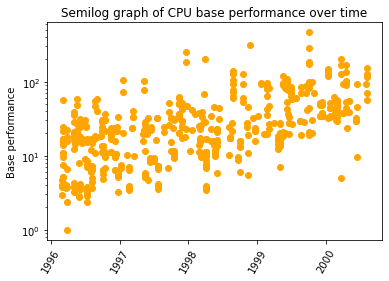

In [94]:
#plot the data in a semi-log plot
plt.semilogy(data['date'], data['base'], 'o', color = 'orange')
plt.xticks(rotation = 60)
plt.title('Semilog graph of CPU base performance over time')
plt.ylabel('Base performance')
plt.show()

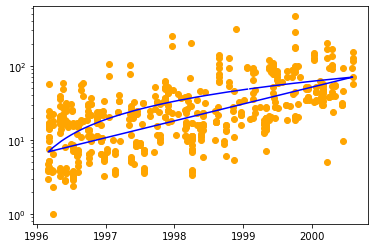

Annual rise in CPU power:  14.367151245118917


In [95]:
#make a regression line
m, b = np.polyfit(data['date'], data['base'], 1) #this means linear regression, when we want quadratic, change 1 -> 2
plt.semilogy(data['date'], data['base'], 'o', color = 'orange')
plt.plot(data['date'], m*data['date']+b, color = 'blue')
plt.show()
print("Annual rise in CPU power: ", str(m))

#or
#from sklearn.linear_model import LinearRegression 
#from numpy import array


According to the graph, we can see that the speed of cpu is getting faster and faster. And from the regression, it seems that the power of CPU is rising by around 7 every year.

### MNIST Digits

(1797, 64)


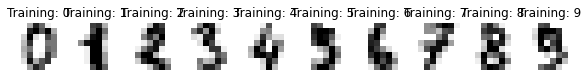

In [1]:
#add more environments for the new task
from sklearn.datasets import load_digits
import pprint
from IPython.display import display, HTML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

digits = load_digits()
print(digits.data.shape)


import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    

In [4]:
print(digits.data)
print(digits.target)
print(digits.target.shape)
print(digits)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797,)
{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pix

In [85]:
X = digits.data 
y = digits.target
trainData,testData,trainLabel,testLabel = train_test_split(X, y, test_size=0.25, random_state=123)

model = KNeighborsClassifier(n_neighbors=5) #just to give it a try
#but this may not be appropriate, depending on how the data will be plotted as the reading said.(it may overfit)
model.fit(trainData,trainLabel)
predictions = model.predict(testData)
print(classification_report(testLabel,predictions))

#from Google, I've found the good guess for k = sqrt(total number of training data)
model = KNeighborsClassifier(n_neighbors=42) #sqrt(1797) is about 42.4 But, with the given training, 5 works well too. 

model.fit(trainData,trainLabel)
predictions = model.predict(testData)
print(classification_report(testLabel,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.89      1.00      0.94        42
           2       0.98      1.00      0.99        41
           3       0.95      1.00      0.98        40
           4       0.98      0.98      0.98        52
           5       1.00      0.98      0.99        48
           6       1.00      1.00      1.00        48
           7       0.98      1.00      0.99        41
           8       1.00      0.87      0.93        45
           9       0.97      0.93      0.95        42

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.97       450
weighted avg       0.98      0.98      0.98       450

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.88      1.00      0.93        42
           2       1.00      0.93      0.96        41
           3       0.95 

Error rate = 1- accuracy. (from up above, it is 5% when k =42, 2% when k = 5)

precision = true positive/spotted positive

recall = true positive/actually positive

f1 score = harmonic mean of the precision and recall = true positive/(true positive + (1/2)(False positive + False negative))

### (Optional) Try test the model on the full dataset. 

In [ ]:
import gzip
